###Training Set-up

In [1]:
!nvidia-smi

Thu Sep 19 03:43:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d4ESC2kCcEscc4OpU8Kh")
project = rf.workspace("mdp-image-recognition-rky6t").project("mdp-image-recognition-r7dyf")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.97, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to MDP-Image-Recognition-1 in yolov8:: 100%|██████████| 610/610 [00:00<00:00, 4484.81it/s]


###Model Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/MDP-Image-Recognition-1/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 49.7M/49.7M [00:00<00:00, 255MB/s]
Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/MDP-Image-Recognition-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch720.jpg
confusion_matrix.png				   R_curve.png	     train_batch721.jpg
events.out.tfevents.1726717474.9c4e3d9f0663.892.0  results.csv	     train_batch722.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


/content


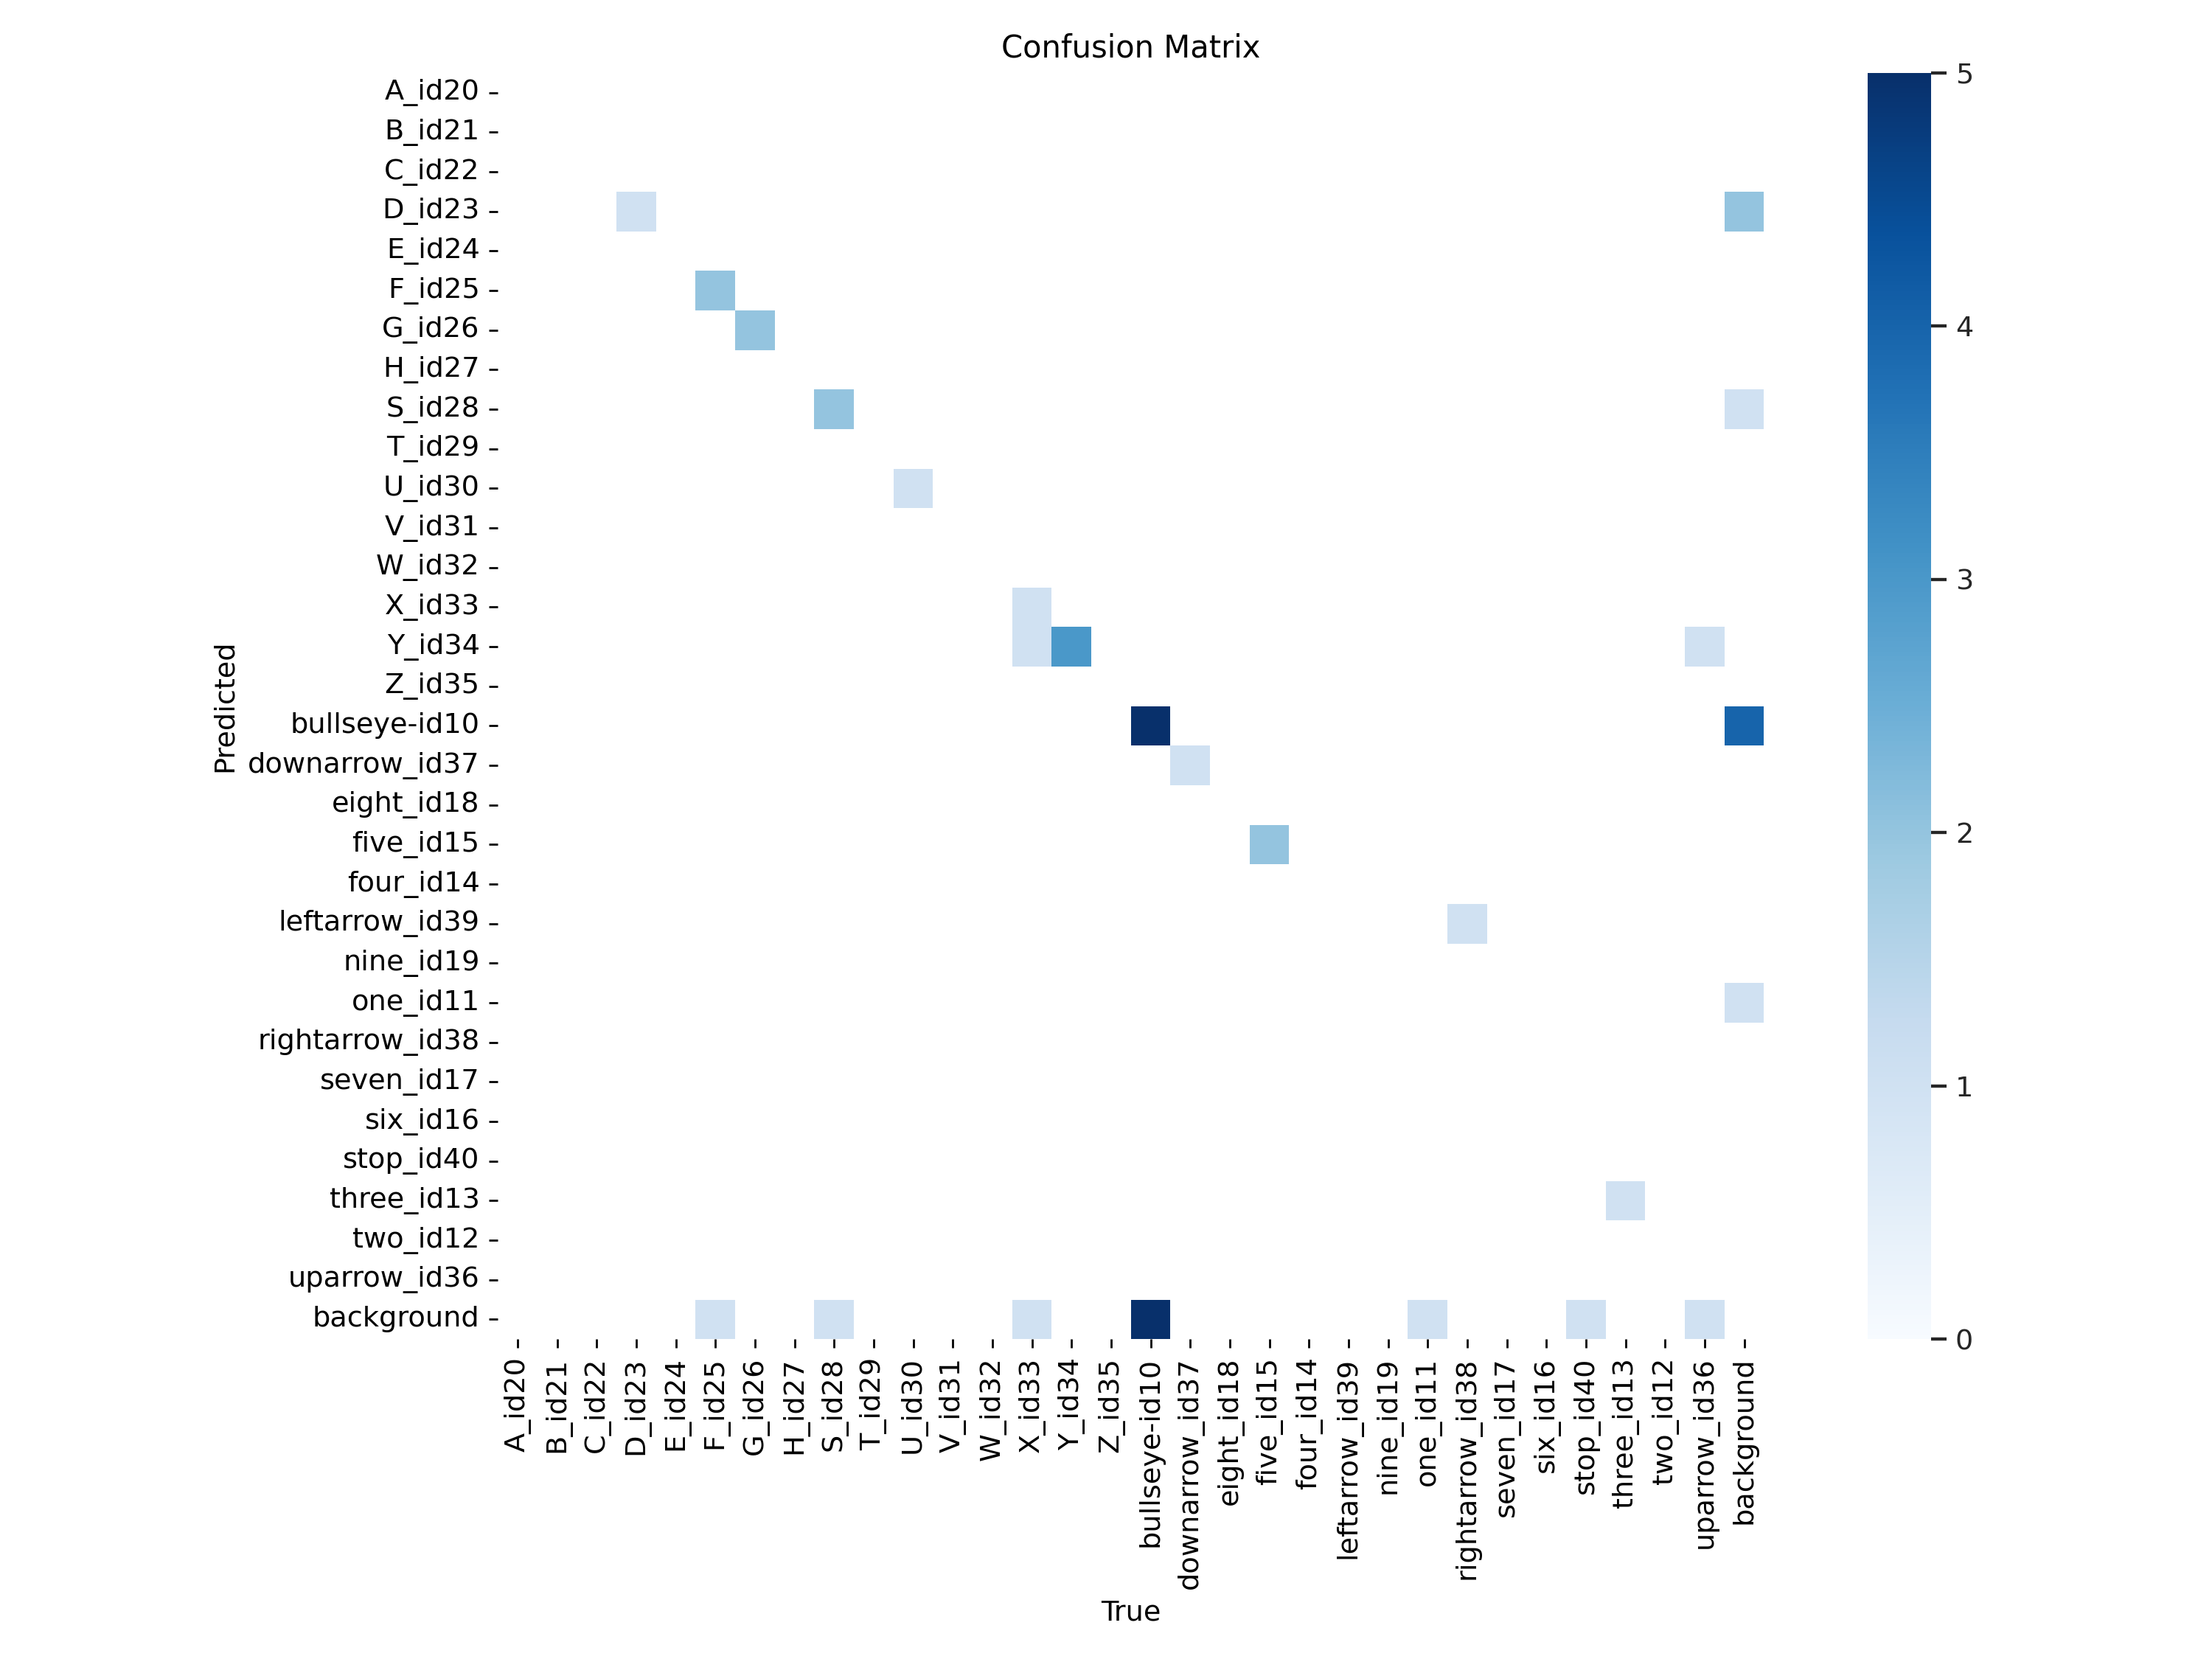

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


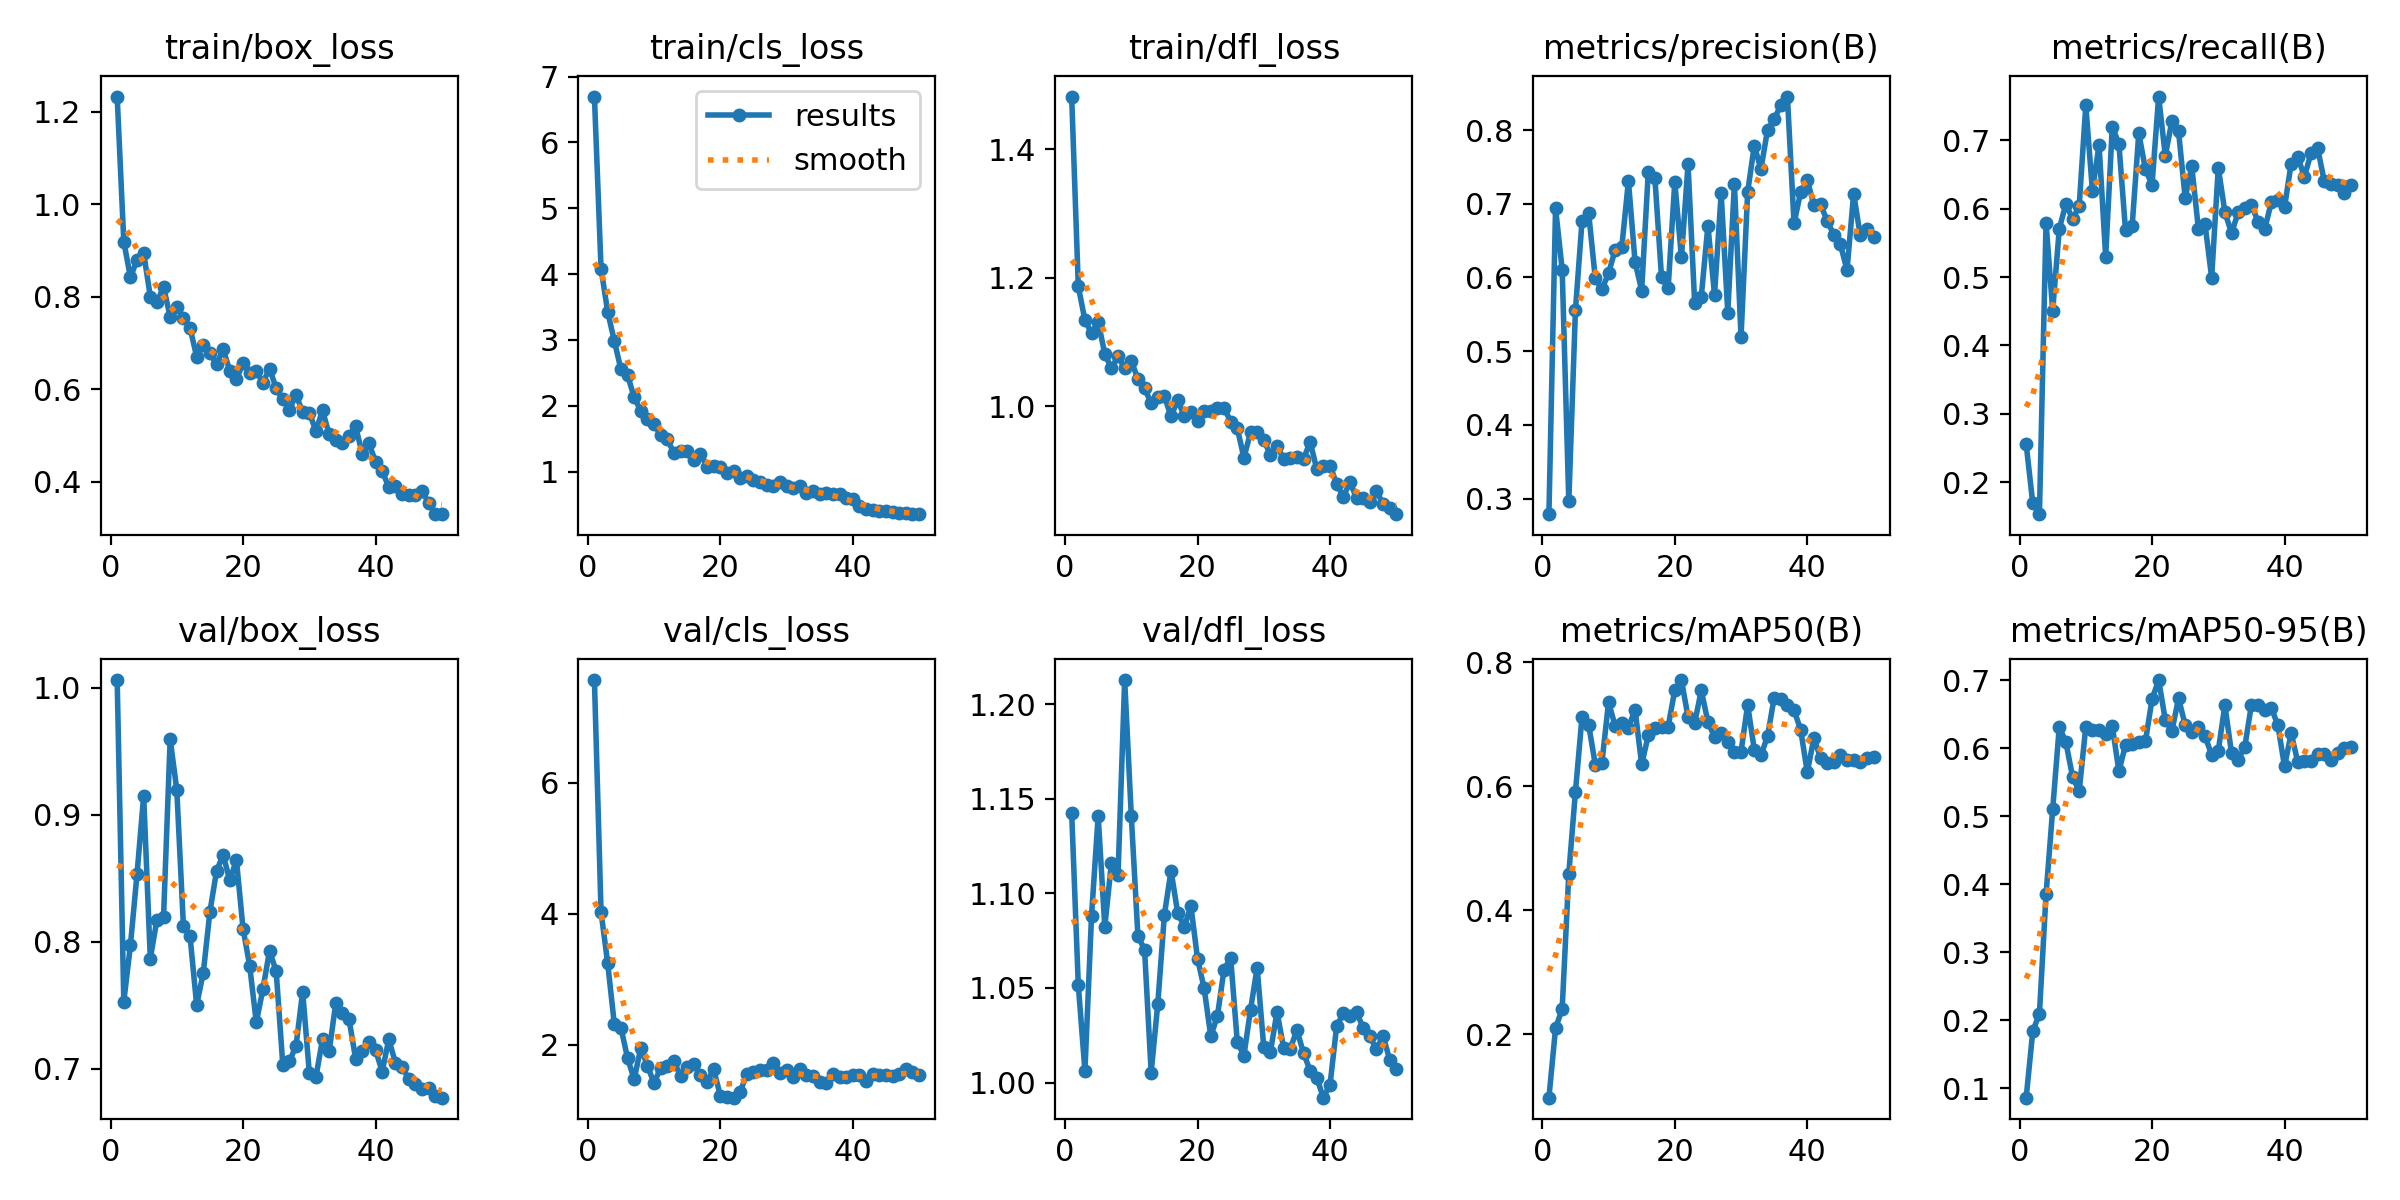

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


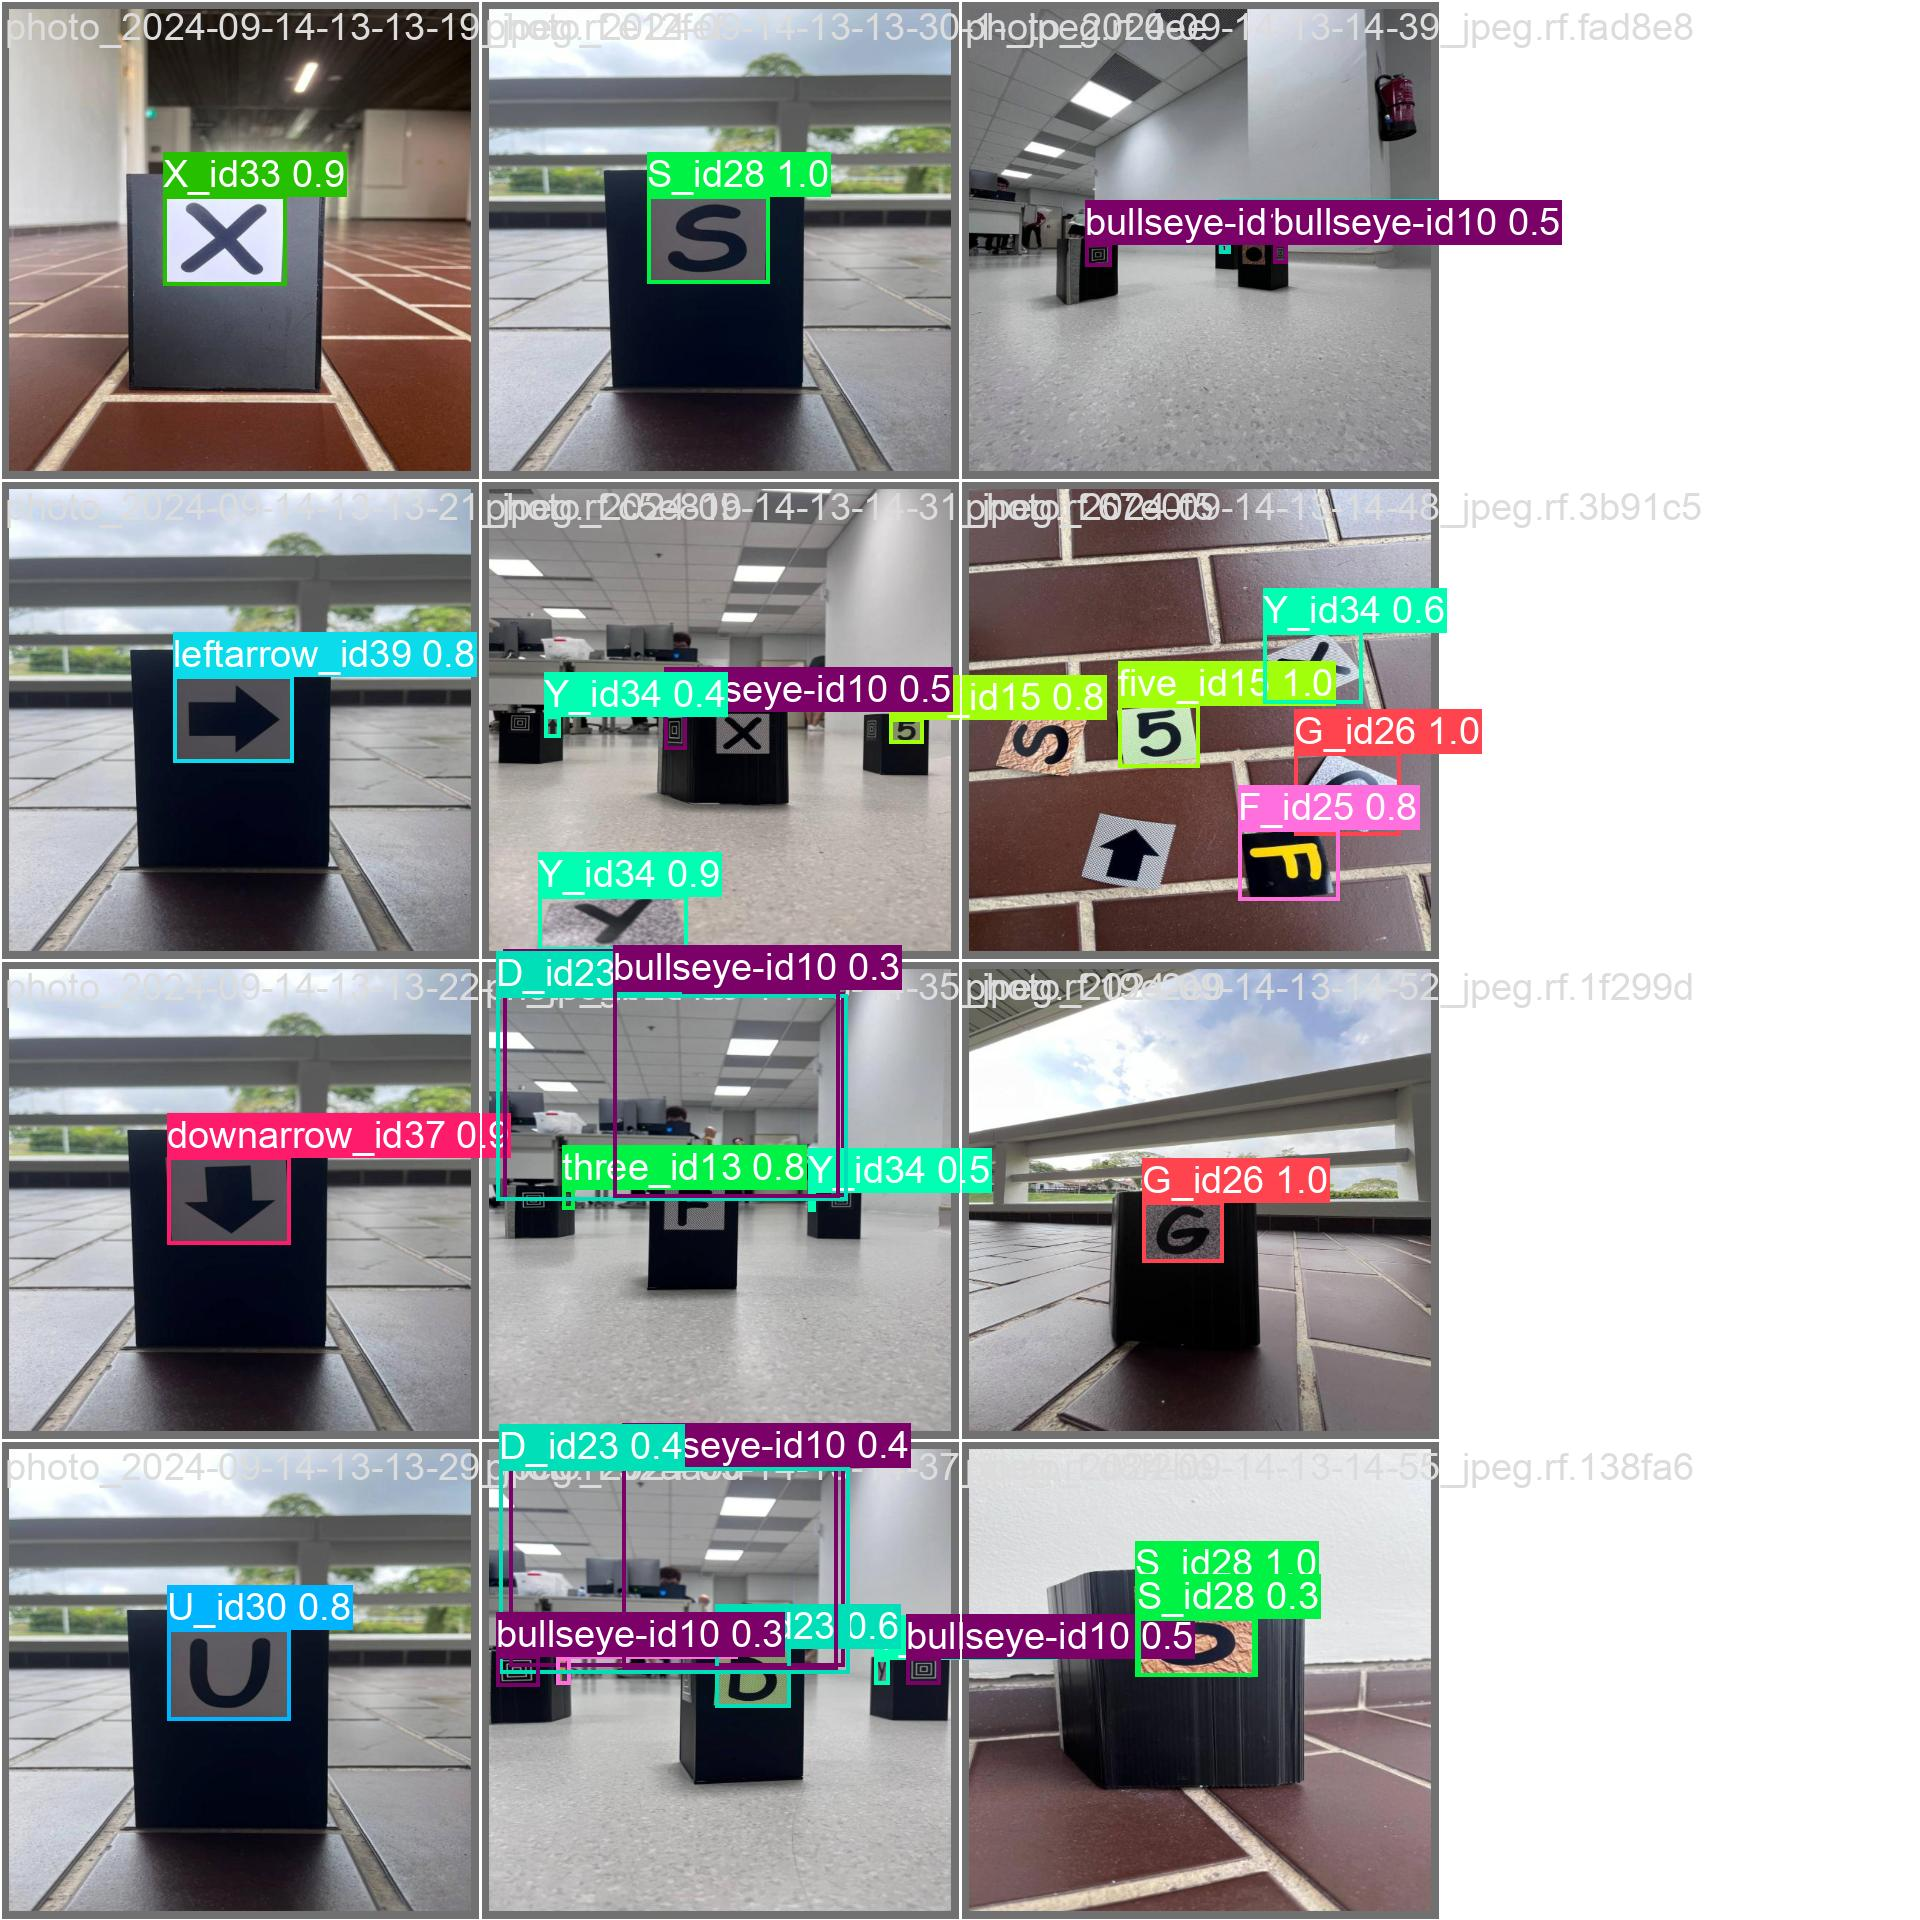

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

###Model Validation

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,857,709 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/datasets/MDP-Image-Recognition-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 35. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.24s/it]
                   all         12         35      0.627      0.764      0.771      0.694
                D_id23          1          1      0.269          1      0.995      0.895
                F_id25          3          3      0.699      0.667      0.913      0.764
                G

###Model Prediction

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,857,709 parameters, 0 gradients, 78.8 GFLOPs

image 1/11 /content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-12-56_jpeg.rf.df39983beb29086b0337eb25b9d08726.jpg: 800x800 1 stop_id40, 59.4ms
image 2/11 /content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-13-25_jpeg.rf.f05c7751bd459b681a6b6b1d9fa34b22.jpg: 800x800 1 Z_id35, 59.1ms
image 3/11 /content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-13-38_jpeg.rf.ea5cc48528c7a0fede9da38a39ec0229.jpg: 800x800 1 eight_id18, 59.0ms
image 4/11 /content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-14-23_jpeg.rf.6d75df7fdedcbb8d1af988249dd3afc6.jpg: 800x800 1 one_id11, 42.4ms
image 5/11 /content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-14-24_jpeg.rf.108ba3ab7a75ce53f84f9a3fdf94f28d.jpg: 800x800 1 one_id11, 42.3ms

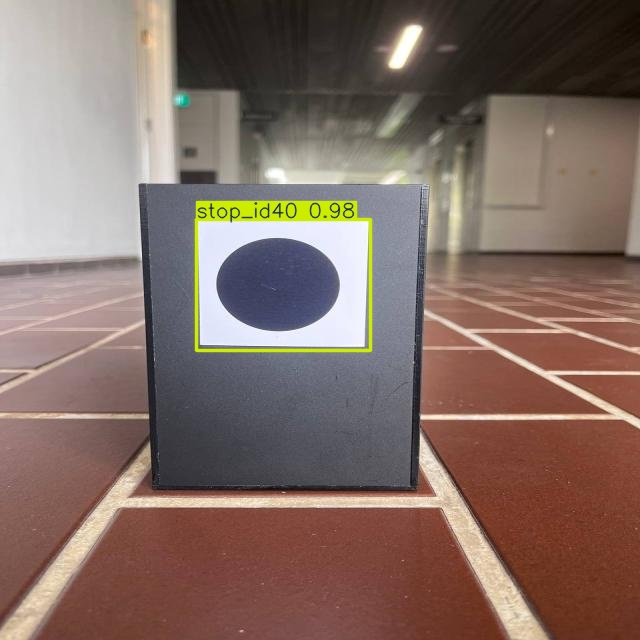

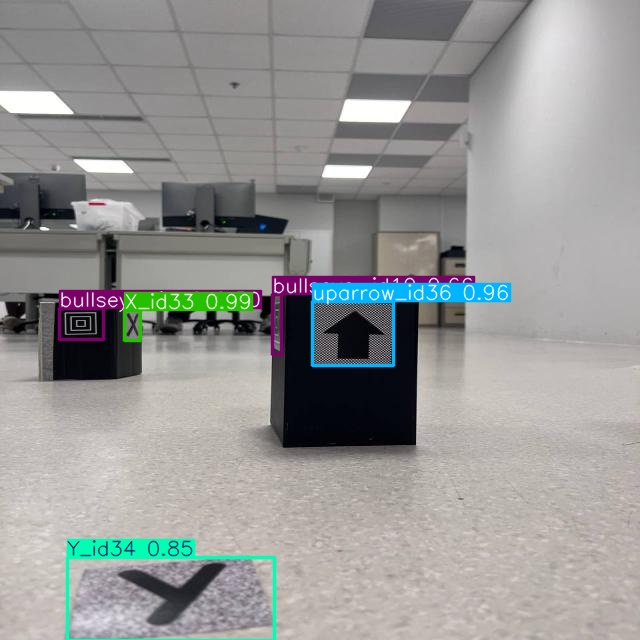

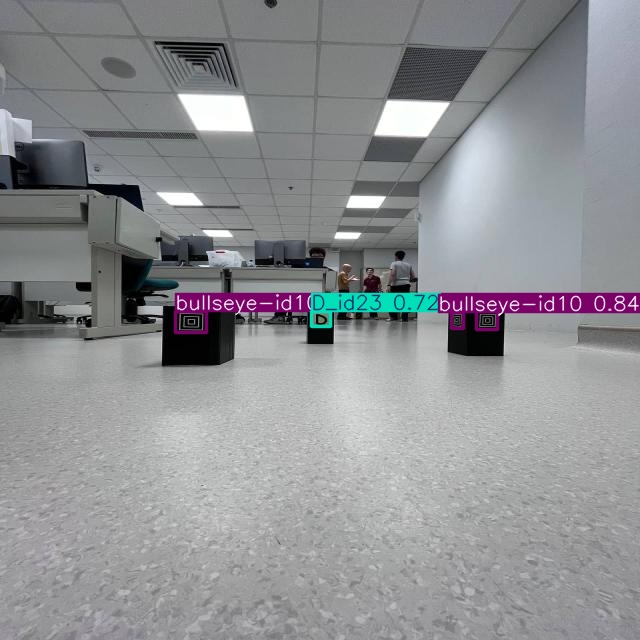

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

### Model Deployment

In [17]:
import os
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import pandas as pd
from ultralytics import YOLO

def load_model(model_path):
    """
    Load the YOLO model from the specified path.
    """
    return YOLO(model_path)

def draw_bbox(image, bbox, label, color=(0, 255, 0)):
    """
    Draw bounding boxes on the image with label.

    Args:
    - image (np.ndarray): The image to draw on.
    - bbox (list): Bounding box coordinates [xmin, ymin, xmax, ymax].
    - label (str): Label to draw.
    - color (tuple): Color for the bounding box.

    Returns:
    - Annotated image.
    """
    xmin, ymin, xmax, ymax = bbox
    image = cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), color, 2)
    image = cv2.putText(image, label, (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    return image

def predict_image(image_path, model):
    """
    Predict objects in the image and return labels ranked by estimated distance.

    Args:
    - image_path (str): Path to the image file.
    - model (YOLO): Loaded YOLO model.

    Returns:
    - List of labels ranked by estimated distance to the camera.
    - Annotated image as a PIL Image.
    """
    # Load the image
    img = Image.open(image_path)
    img_np = np.array(img)  # Convert image to NumPy array for OpenCV processing

    # Predict the image using the model
    results = model.predict(img)
    result = results[0]

    # Move tensors to CPU and convert to numpy arrays
    boxes = result.boxes.xyxy.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    classes = [model.names[int(cls)] for cls in result.boxes.cls.cpu().numpy()]

    # Convert results to a pandas dataframe
    df_results = pd.DataFrame(boxes, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    df_confidence = pd.DataFrame(confidences, columns=['confidence'])
    df_name = pd.DataFrame(classes, columns=['name'])

    df_results = pd.concat([df_results, df_confidence, df_name], axis=1)

    # Calculate the height and width of the bounding box and the area
    df_results['bbox_height'] = df_results['ymax'] - df_results['ymin']
    df_results['bbox_width'] = df_results['xmax'] - df_results['xmin']
    df_results['bbox_area'] = df_results['bbox_height'] * df_results['bbox_width']

    # Rank objects by estimated distance (largest bbox area is closest)
    df_results = df_results.sort_values('bbox_area', ascending=False)

    # Filter out unwanted labels (e.g., 'Bullseye_id10')
    df_results = df_results[df_results['name'] != 'Bullseye_id10']

    # Draw bounding boxes on the image
    for _, row in df_results.iterrows():
        bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        label = row['name']
        img_np = draw_bbox(img_np, bbox, label)

    # Convert annotated image back to PIL Image
    annotated_img = Image.fromarray(img_np)

    # Return labels ranked by estimated distance and the annotated image
    labels_ranked_by_distance = df_results['name'].tolist()

    return labels_ranked_by_distance, annotated_img

def main(image_path, model_path):
    # Load the model
    model = load_model(model_path)

    # Predict and get ranked labels and annotated image
    labels, annotated_image = predict_image(image_path, model)

    # Save or display the annotated image
    annotated_image_path = 'annotated_image.jpg'
    annotated_image.save(annotated_image_path)

    print(f"Recognised Labels ranked by estimated distance from the camera: {labels}")
    print(f"Recognised image saved as {annotated_image_path}")

if __name__ == "__main__":
    # Update image_path to the rpi image below:
    image_path = '/content/datasets/MDP-Image-Recognition-1/test/images/photo_2024-09-14-13-14-43_jpeg.rf.714d2c6f6509cbe6b8f963af11078a9f.jpg'
    # Update model path upon integration:
    model_path = '/content/best.pt'

    main(image_path, model_path)



0: 800x800 1 D_id23, 3 bullseye-id10s, 59.1ms
Speed: 5.8ms preprocess, 59.1ms inference, 4.8ms postprocess per image at shape (1, 3, 800, 800)
Recognised Labels ranked by estimated distance from the camera: ['bullseye-id10', 'bullseye-id10', 'D_id23', 'bullseye-id10']
Recognised image saved as annotated_image.jpg
